In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [41]:
airport_comps = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Data Presentation and Visualizations/Datasets/TSA/complaints-by-airport.csv")
cat_comps = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Data Presentation and Visualizations/Datasets/TSA/complaints-by-category.csv")
subcat_comps = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Data Presentation and Visualizations/Datasets/TSA/complaints-by-subcategory.csv")
codes = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Data Presentation and Visualizations/Datasets/TSA/iata-icao.csv")

In [42]:
subcat_comps.head()

,pdf_report_date,airport,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed
0,2019-02,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False
1,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
2,2019-02,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False
3,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
4,2019-02,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False


In [43]:
subcat_comps = subcat_comps.rename(columns = {'airport': 'airport_code'})

In [44]:
codes.head()

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,OMAA,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,NaN,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,OMAM,Al Dhafra Air Base,24.2482,54.5477


In [45]:
codes = codes.rename(columns = {'iata': 'airport_code'})

In [46]:
codes = codes.drop(columns = ['icao'])

In [47]:
codes.head()

,country_code,region_name,airport_code,airport,latitude,longitude
0,AE,Abu Zaby,AAN,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,Al Dhafra Air Base,24.2482,54.5477


In [48]:
complaints = subcat_comps.merge(codes, on = ['airport_code'], how = 'inner')
complaints

,pdf_report_date,airport_code,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed,country_code,region_name,airport,latitude,longitude
0,2019-02,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
1,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
2,2019-02,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
3,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
4,2019-02,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489737,2019-02,YNG,Mishandling of Passenger Property,Disarrayed Items--Carry-on or Checked,2015-12,0,Mishandling of Passenger Property,Disarrayed Items--Carry-on or Checked,original,original,False,US,Ohio,Youngstown-Warren Regional Airport,41.2607,-80.6791
489738,2019-02,YNG,Persons w/ Disabilities (PWD),Hearing Impairment,2015-12,0,Persons w/ Disabilities (PWD),Hearing Impairment,original,original,False,US,Ohio,Youngstown-Warren Regional Airport,41.2607,-80.6791
489739,2019-02,YNG,Persons w/ Disabilities (PWD),Metal Implants (joint),2015-12,0,Persons w/ Disabilities (PWD),Metal Implants (joint),original,original,False,US,Ohio,Youngstown-Warren Regional Airport,41.2607,-80.6791
489740,2019-02,YNG,Screening,Inconsistency,2015-12,0,Screening,Inconsistency,original,original,False,US,Ohio,Youngstown-Warren Regional Airport,41.2607,-80.6791


In [49]:
complaints = complaints.drop(columns = ['pdf_report_date', 'category', 'subcategory', 'clean_cat_status', 'clean_subcat_status', 
                                        'is_category_prefix_removed'])
complaints.head()

,airport_code,year_month,count,clean_cat,clean_subcat,country_code,region_name,airport,latitude,longitude
0,ABE,2015-01,0,Hazardous Materials Safety,General,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
1,ABE,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
2,ABE,2015-02,0,Hazardous Materials Safety,General,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
3,ABE,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
4,ABE,2015-03,0,Hazardous Materials Safety,General,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408


In [50]:
complaints = complaints.rename(columns = {
    'clean_cat': 'category',
    'clean_subcat': 'subcategory'})

In [112]:
most_complaints = complaints.groupby('airport')['count'].count()
most_complaints.sort_values(ascending=False).head(1)

airport
Orlando International Airport    6413
Name: count, dtype: int64

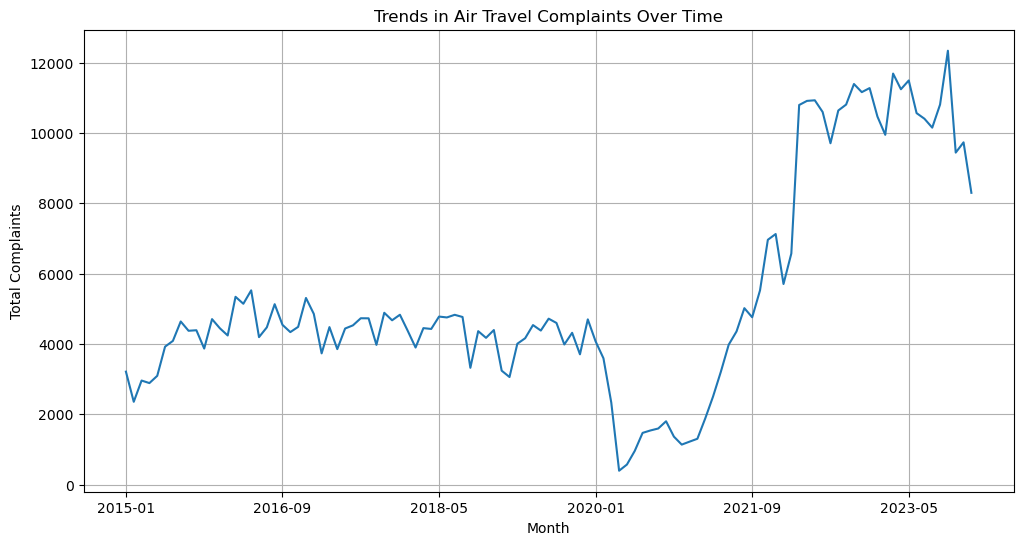

In [51]:
# 4. Time Series Line Chart - Complaint Trends
plt.figure(figsize=(12,6))
complaints.groupby('year_month')['count'].sum().plot()
plt.title("Trends in Air Travel Complaints Over Time")
plt.xlabel("Month")
plt.ylabel("Total Complaints")
plt.grid()
plt.show()

In [52]:
# 3. Choropleth Map - Complaints by Location
#fig = px.scatter_geo(complaints, lat='latitude', lon='longitude', size='count', 
                     #title='Complaints by Location', projection="albers usa")
#fig.show()

In [53]:
selected_airports = ['MCO', 'LAX', 'SLC', 'RNO', 'MFR']
my_airports = complaints[complaints['airport_code'].isin(selected_airports)]

In [54]:
# Example dictionary mapping airport codes to city names
airport_dict = {
    'MCO': 'Orlando',
    'LAX': 'Los Angeles',
    'SLC': 'Salt Lake City',
    'RNO': 'Reno, NV',
    'MFR': 'Medford, OR'
}

# Replace airport codes with city names
my_airports['airport_code'] = my_airports['airport_code'].map(airport_dict)

# Rename the column to 'city'
my_airports.rename(columns={'airport_code': 'city'}, inplace=True)

C:\Users\kromi\AppData\Local\Temp\ipykernel_8164\2982548607.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_airports['airport_code'] = my_airports['airport_code'].map(airport_dict)
C:\Users\kromi\AppData\Local\Temp\ipykernel_8164\2982548607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_airports.rename(columns={'airport_code': 'city'}, inplace=True)


In [55]:
my_airports = my_airports[my_airports['year_month'] >= '2018-01']
my_airports.head()

,city,year_month,count,category,subcategory,country_code,region_name,airport,latitude,longitude
246922,Los Angeles,2018-01,0,Civil Rights,Age,US,California,Los Angeles International Airport,33.9425,-118.408
246923,Los Angeles,2018-01,0,Civil Rights,Constitutional Rights,US,California,Los Angeles International Airport,33.9425,-118.408
246924,Los Angeles,2018-01,0,Civil Rights,Hair Patdowns,US,California,Los Angeles International Airport,33.9425,-118.408
246925,Los Angeles,2018-01,0,Civil Rights,Headwear,US,California,Los Angeles International Airport,33.9425,-118.408
246926,Los Angeles,2018-01,1,Civil Rights,National Origin,US,California,Los Angeles International Airport,33.9425,-118.408


In [56]:
my_airports['category'].unique()

array(['Civil Rights', 'Customer Service', 'Locks', 'Lost and Found',
       'Mishandling of Passenger Property', 'Patdown',
       'Persons w/ Disabilities (PWD)', 'Prohibited & Permitted Items',
       'Property - Special Handling', 'Request for Assistance',
       'Screening', 'Advanced Imaging Technology (AIT)',
       'Identification (ID) Requirements', 'TSA Contact Information',
       'Airline', 'Claims', 'DHS TRIP', 'Duplicate E-mail',
       'Expedited Passenger Screening Program', 'General Aviation',
       'HAZMAT Endorsement', 'Hazardous Materials Safety',
       'Human Capital', 'No Jurisdiction', 'No Subject',
       'Notice of Violation/Civil Penalties', 'Cargo', 'TWIC',
       'Additional Information Required/Insufficient Information',
       'Business, Suggestions, and Ideas',
       'Freedom of Information Act (FOIA)', 'Ombudsman',
       'CSM/Stakeholder Follow-up', 'Intranet/Internet Inquiries'],
      dtype=object)

In [57]:
# Drop rows where the subcategory is 'Hostile Work Environment (TSA Employee)'
my_airports = my_airports[my_airports['category'] != 'Intranet/Internet Iquiries']
my_airports = my_airports[my_airports['category'] != 'Freedom of Information Act (FOIA)']
my_airports = my_airports[my_airports['category'] != 'No Jurisdiction']

In [58]:
my_airports['subcategory'].unique()

array(['Age', 'Constitutional Rights', 'Hair Patdowns', 'Headwear',
       'National Origin', 'Perceived Religion',
       'Racial Profiling or Discrimination',
       'Screening of Religious Cultural and Ceremonial Items',
       'Screening of Religious or Cultural Garments',
       'Sex/Gender/Gender Identity- Not Transgender',
       'Sexual Orientation - Not Transgender', 'Transgender Screening',
       'Others', 'TSO', 'General', 'Missing or Damaged Lock',
       'Airport/TSA', '*Damaged/Missing Items--Carry-on Luggage',
       '*Damaged/Missing Items--Checked Baggage',
       '*Damaged/Missing Items--Unspecified Luggage',
       'Disarrayed Items--Carry-on or Checked', 'Flyer',
       'Flyer as Observer', 'Non-Flyer', 'Autism Spectrum',
       'Breast Cancer', 'Cancer (general) Not Breast Cancer', 'Diabetes',
       'Diapers/Garments/Dressings/Masks', 'Internal Medical Devices',
       'Medical Devices - Attached to the Body',
       'Medically Necessary Medication and Medical Su

In [59]:
# Drop rows where the subcategory is 'Hostile Work Environment (TSA Employee)'
my_airports = my_airports[my_airports['subcategory'] != 'Hostile Work Environment (TSA Employee)']
my_airports = my_airports[my_airports['subcategory'] != 'Cruise Ships']
my_airports = my_airports[my_airports['subcategory'] != 'Current Topic']
my_airports = my_airports[my_airports['subcategory'] != 'EMAIL ONLY']
my_airports = my_airports[my_airports['subcategory'] != 'Prospective Employment with TSA']
my_airports = my_airports[my_airports['subcategory'] != 'TCC']
my_airports = my_airports[my_airports['subcategory'] != 'Crew Member or Airline Employee']
my_airports = my_airports[my_airports['subcategory'] != 'TSA Application Program']
my_airports = my_airports[my_airports['subcategory'] != '*']

# Check the updated DataFrame
my_airports.head()

,city,year_month,count,category,subcategory,country_code,region_name,airport,latitude,longitude
246922,Los Angeles,2018-01,0,Civil Rights,Age,US,California,Los Angeles International Airport,33.9425,-118.408
246923,Los Angeles,2018-01,0,Civil Rights,Constitutional Rights,US,California,Los Angeles International Airport,33.9425,-118.408
246924,Los Angeles,2018-01,0,Civil Rights,Hair Patdowns,US,California,Los Angeles International Airport,33.9425,-118.408
246925,Los Angeles,2018-01,0,Civil Rights,Headwear,US,California,Los Angeles International Airport,33.9425,-118.408
246926,Los Angeles,2018-01,1,Civil Rights,National Origin,US,California,Los Angeles International Airport,33.9425,-118.408


In [60]:
# Define the mapping for subcategories
subcategory_mapping = {
    'Age': 'Age',
    'Policy & Rights': 'Policy & Rights',
    'Hair Patdowns': 'Hair Patdowns',
    'National Origin': 'National Origin',
    'Perceived Religion': 'Perceived Religion',
    'Racial Profiling or Discrimination': 'Racial Profiling or Discrimination',
    'Sex/Gender/Gender Identity': 'Sex/Gender/Gender Identity',
    'Transgender Screening': 'Sex/Gender/Gender Identity',
    'Other': 'Other',
    'TSO': 'Transportation Security Officer',
    'Domestic': 'Domestic',
    'Baggage Issues': 'Baggage Issues',
    'Airport/TSA': 'Airport/TSA',
    'Damaged/Missing Items': 'Damaged/Missing Items',
    'Disarrayed Items--Carry-on or Checked': 'Disarrayed Items',
    'Flyer': 'Flyer',
    'Non-Flyer': 'Non-Flyer',
    'Breast Cancer': 'Cancer',
    'Cancer (general) Not Breast Cancer': 'Cancer',
    'Cognitive /Developmental /Mental Disability': 'Cognitive Disability',
    'Diabetes': 'Diabetes',
    'Diapers/Garments/Dressings/Masks': 'Diapers/Garments/Dressings/Masks',
    'General': 'General',
    'Internal Medical Devices': 'Internal Medical Devices',
    'Medical Devices - Attached to the Body': 'External Medical Devices',
    'Medically Necessary Medication and Medical Supplies': 'Medically Necessary Supplies',
    'Metal Implants (joint)': 'Internal Medical Devices',
    'Assistive & Mobility Devices': 'Assistive & Mobility Devices',
    'Medical Devices': 'Medical Devices',
    'Respiratory and Inhaler Equipment': 'External Medical Devices',
    'Service Animals': 'Service Animals',
    'Touch Aversion (pain/trauma)': 'Touch Aversion (pain/trauma)',
    'Visual Impairment': 'Physical Disability',
    'Wheelchair & Mobility Assistance': 'Wheelchair & Mobility Assistance',
    'Damaged Items': 'Damaged/Missing Items',
    'Missing Items': 'Missing/Missing Items',
    'Wounded Warrior (MSIJSOC)': 'Wounded Warrior',
    'Inconsistency': 'Inconsistency',
    'Lengthy Lines': 'Lengthy Lines',
    'Procedures/Process': 'Procedures/Process',
    'Retrieving Abandoned/Confiscated Items': 'Retrieving Abandoned/Confiscated Items',
    'Security & Screening': 'Security & Screening',
    'Autism Spectrum': 'Cognitive Disability',
    'Hearing Impairment': 'Physical Disability',
    'Alcohol and Tobacco': 'Alcohol and Tobacco',
    'Ostomy/Ostomates': 'Ostomy/Ostomates',
    'Crew Member or Airline Employee': 'Crew Member or Airline Employee',
    'Discrimination & Civil Rights': 'Discrimination & Civil Rights',
    'Status': 'Status',
    'CSM': 'Customer Service Manager',
    'DoD': 'DoD',
    'Over 75': 'Over 75',
    'TSA PreCheck': 'TSA PreCheck',
    'TSA/DHS Employees': 'TSA/DHS Employees',
    'International Travel': 'International Travel',
    'No Referral': 'No Referral',
    'Referral': 'Referral',
    'Breast Milk & Baby Items': 'Breast Milk & Baby Items',
    'Firearm/Ammunition': 'Firearm/Ammunition',
    'Food/Beverages': 'Food/Beverages',
    'Liquids/Gels/Aerosols': 'Liquids/Gels/Aerosols',
    'Children': 'Children',
    'Shoe Screening': 'Shoe Screening',
    'Profiling': 'Racial Profiling or Discrimination',
    'Race': 'Racial Profiling or Discrimination',
    'Active Duty Military': 'Military',
    'Minors Domestic': 'Children',
    'Wounded Warrior': 'Wounded Warrior',
    'Beauty & Grooming Items': 'Beauty & Grooming Items',
    'Electronic Devices': 'Electronic Devices',
    'Gate Pass': 'Gate Pass',
    'Reportable Communication': 'Reportable Communication',
    'Known Shipper': 'Known Shipper',
    'Screening of Religious or Cultural Garments': 'Screening of Religious or Cultural Garments',
    'International Screening': 'International Screening',
    'Not Specified': 'Not Specified',
    'Carry-On': 'Carry-On',
    'Ice/Gel Packs': 'Ice/Gel Packs',
    'Sporting Goods': 'Sporting Goods',
    'Military': 'Military',
    'Traveling with Cash': 'Traveling with Cash',
    'Real ID': 'Real ID',
    'Headwear': 'Headwear',
    'Knives/Tools/Razors/Sharp Objects': 'Knives/Tools/Razors/Sharp Objects',
    'Former Employee': 'Former Employee',
    'ID Matching Ticket and Boarding Pass Issues': 'ID Matching Ticket and Boarding Pass Issues',
    'Marijuana': 'Marijuana',
    'Medication/Prescription/Medically Necessary Items': 'Medically Necessary Supplies',
    'Remains': 'Remains',
    'Indirect Air Carrier (IAC)': 'Indirect Air Carrier (IAC)',
    'Known Crew Member': 'Known Crew Member',
    'Lighters/Matches': 'Lighters/Matches',
    'Non-Persons w/ Disabilities (PWD)': 'Non-Persons w/ Disabilities (PWD)',
    'Opposite Gender': 'Sex/Gender/Gender Identity',
    'Baggage Requirements': 'Baggage Requirements',
    'Positive Bag Match Program': 'Positive Bag Match Program',
    '*Damaged/Missing Items': 'Damaged/Missing Items',
    '*Damaged Items': 'Damaged Items'
}

# Update the 'subcategory' column in the my_airports DataFrame using the mapping
my_airports['subcategory'] = my_airports['subcategory'].map(subcategory_mapping)

In [61]:
my_airports.isna().sum()

city               0
year_month         0
count              0
category           0
subcategory     4412
country_code       0
region_name        0
airport            0
latitude           0
longitude          0
dtype: int64

In [62]:
my_airports.shape

(13461, 10)

In [63]:
my_airports = my_airports.dropna(subset = ['subcategory'])

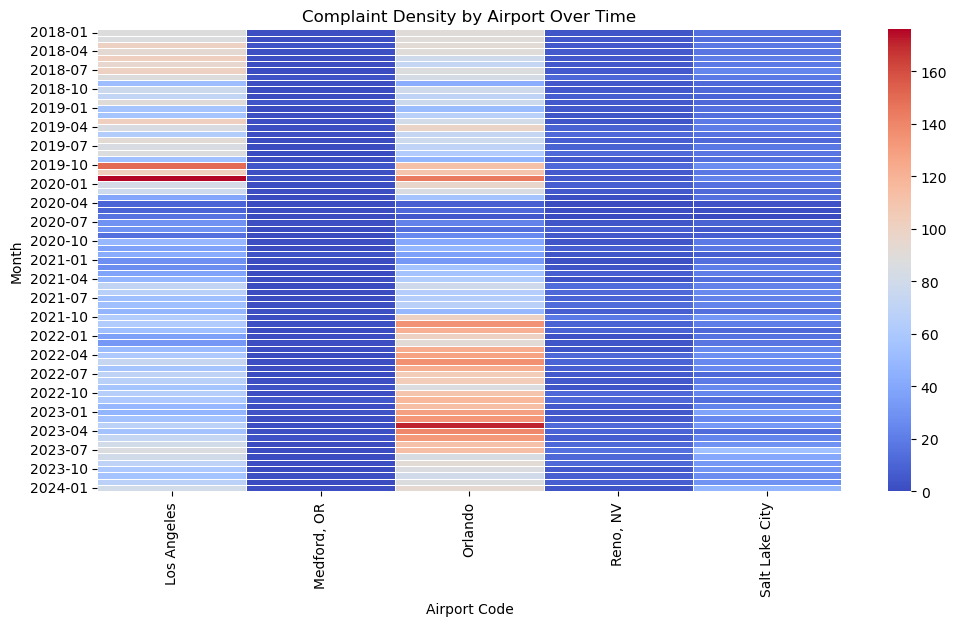

In [64]:
# 1. Heat Map - Complaint Density by Region
plt.figure(figsize=(12,6))
pivot_table = my_airports.pivot_table(index='year_month', columns='city', values='count', aggfunc='sum')
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=0.5)
plt.title("Complaint Density by Airport Over Time")
plt.xlabel("Airport Code")
plt.ylabel("Month")
plt.show()

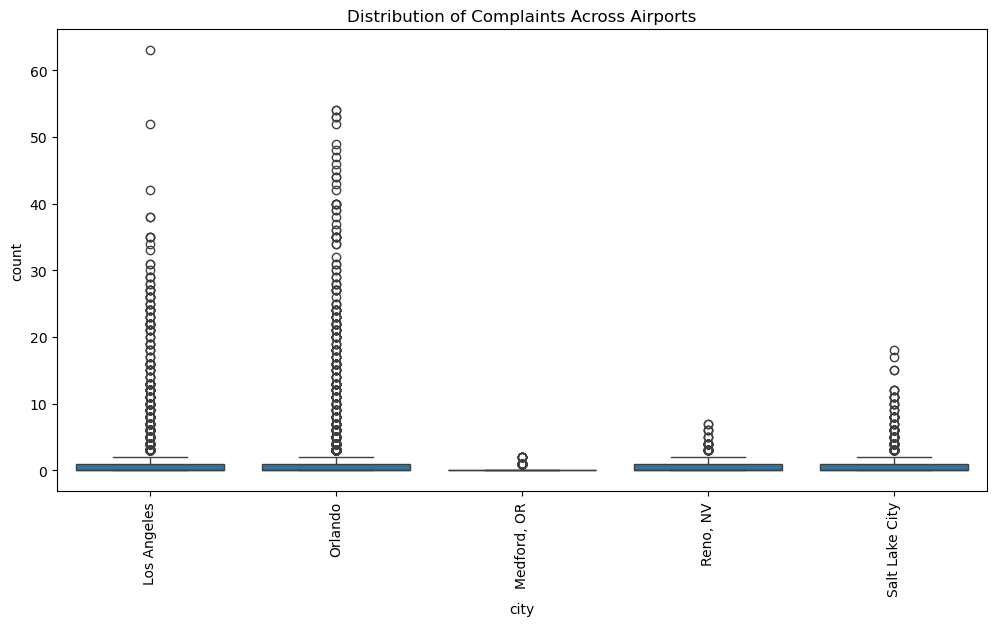

In [65]:
# 2. Box Plot - Distribution of Complaints per Airport
plt.figure(figsize=(12,6))
sns.boxplot(x='city', y='count', data=my_airports)
plt.title("Distribution of Complaints Across Airports")
plt.show()

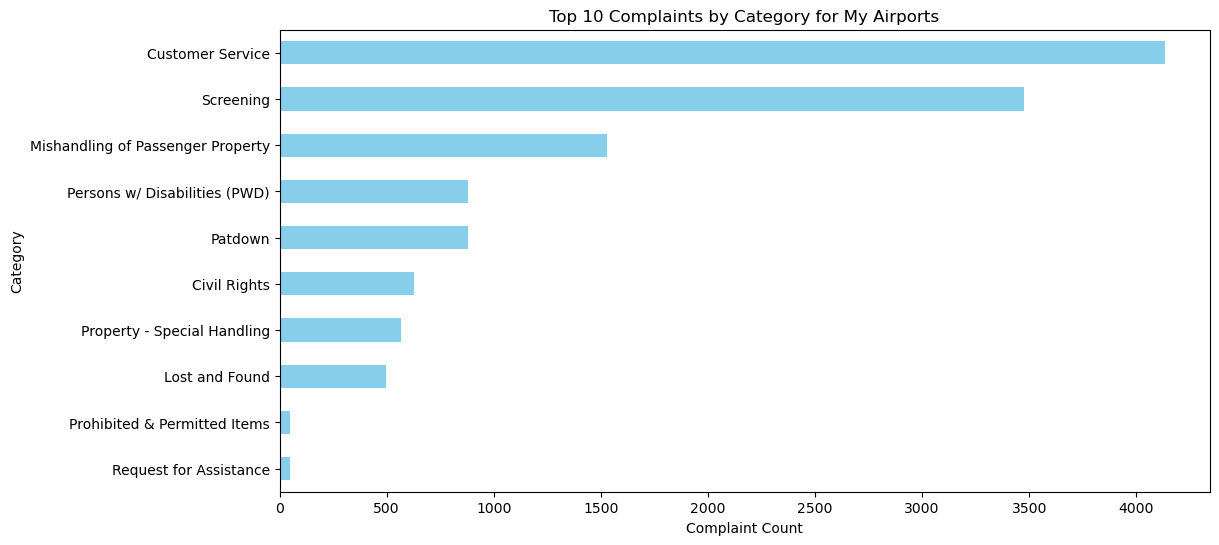

In [66]:
plt.figure(figsize=(12, 6))

# Group by 'category', sum the 'count', and get the top 10 categories
top_10_categories = my_airports.groupby('category')['count'].sum().nlargest(10)

# Create the bar chart using the top 10 categories
top_10_categories.sort_values().plot(kind='barh', color='skyblue')

plt.title("Top 10 Complaints by Category for My Airports")
plt.xlabel("Complaint Count")
plt.ylabel("Category")
plt.show()

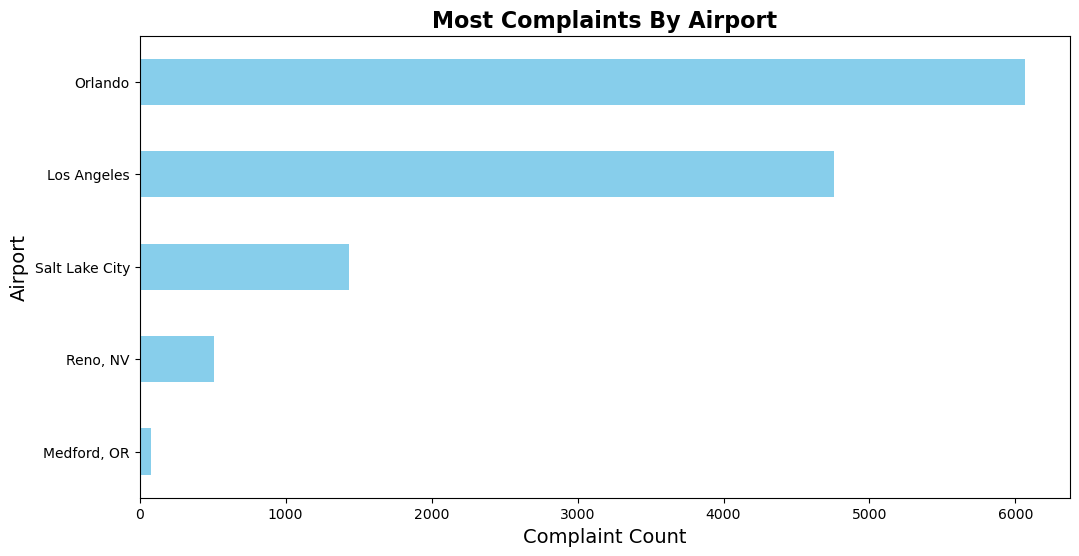

In [100]:
plt.figure(figsize=(12, 6))

# Group by 'category', sum the 'count', and get the top 10 categories
top_10_categories = my_airports.groupby('city')['count'].sum().nlargest(10)

# Create the bar chart using the top 10 categories
top_10_categories.sort_values().plot(kind='barh', color='skyblue')

plt.title("Most Complaints By Airport", fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'sans-serif'})
plt.xlabel("Complaint Count", fontdict={'fontsize': 14, 'fontfamily': 'sans-serif'})
plt.ylabel("Airport", fontdict={'fontsize': 14, 'fontfamily': 'sans-serif'})
plt.show()